In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pystan

In [11]:
def normal(x,sig,var,A):
    exp = A/(np.sqrt(2*np.pi)*var) * np.exp(-(x-sig)**2/(2*var**2))
    return(exp)

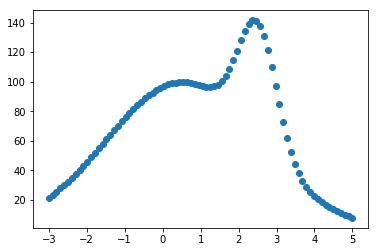

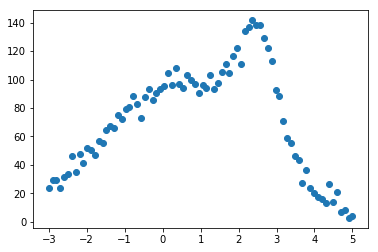

In [21]:
x = np.linspace(-3,5,80)
y = normal(x,2.5,0.5,100) + normal(x,0.5,2.0,500)
plt.scatter(x,y)
plt.show()

x = np.linspace(-3,5,80)
y = normal(x,2.5,0.5,100) + normal(x,0.5,2.0,500) + np.random.normal(loc=0.0,scale=5,size=80)
plt.scatter(x,y)
plt.show()

In [33]:
schools_code = """
functions{
    real double_normal_lpdf(real x, real mu1, real sig1, real A1, real mu2, real sig2, real A2){
        return log(A1) - log(2*pi())/2 - log(sig1) - (square(x-mu1)/(2*square(sig1))) + log(A2) - log(2*pi())/2 - log(sig2) - (square(x-mu2)/(2*square(sig2)));
 
    }
}
data {
    int<lower=0> num_q;
    vector[num_q] q; // q values
    vector[num_q] N; // number of galaxies with value of q
}
parameters {
    real sigsf;
    real varsf;
    real ampsf;
    real sigagn;
    real varagn;
    real ampagn;
}
model {

    for n in 1:num_q{
        target += double_normal_lpdf(q | sigsf, varsf, ampsf, sigagn, varagn, ampagn) ;
    }
}
"""

schools_dat = {'num_q': 80,
               'q': x,
               'N': y,}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

ValueError: Failed to parse Stan model 'anon_model_b6f906c7adbf036b793a9e2f68b3dfe8'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

  error in 'unknown file name' at line 23, column 9
  -------------------------------------------------
    21: model {
    22: 
    23:     for n in 1:num_q{
                ^
    24:         target += double_normal_lpdf(q | sigsf, varsf, ampsf, sigagn, varagn, ampagn) ;
  -------------------------------------------------

PARSER EXPECTED: "("


In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.
/its/home/im281/anaconda3/envs/herschelhelp/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /tmp/tmpd3h6ok6r/stanfit4anon_model_19a09b474d1901f191444eaf8a6b8ce2_8680193153864366944.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


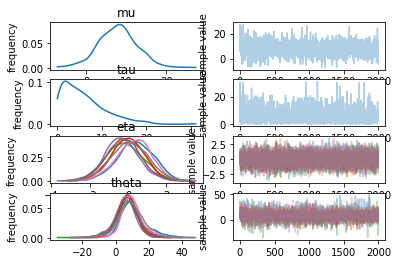

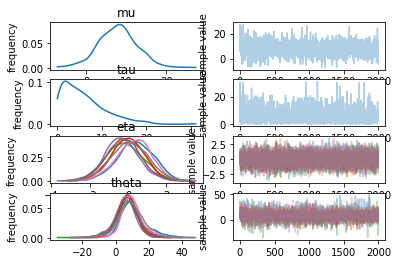

In [5]:
fit.plot()

In [9]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
len(la['mu'])

2000

In [8]:
la

OrderedDict([('mu',
              array([ 6.84583549, 10.11338146, 18.2872193 , ...,  8.47693295,
                      8.23992386,  5.70855459])),
             ('tau',
              array([1.3629112 , 1.52968725, 5.9775605 , ..., 9.17907698, 2.46007969,
                     2.60825232])),
             ('eta',
              array([[ 0.54511052,  1.74076613,  0.37630668, ..., -0.42632131,
                       0.07429494, -0.17218142],
                     [-0.60238128, -0.29956221,  1.18468579, ..., -0.0605296 ,
                      -0.98992602,  0.03587462],
                     [-0.0387652 , -1.83480849,  0.88879657, ..., -0.91257102,
                      -1.00807568, -0.30686401],
                     ...,
                     [ 0.58540856, -1.75457503,  0.27014594, ...,  0.77340334,
                      -0.67551575,  0.72466723],
                     [ 2.23067894, -0.44042721, -0.27738847, ...,  0.09040627,
                       1.85478651,  0.73704456],
                     [